In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"D:\Data_Science\datasets\netflix\netflix_titles.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [31]:
#  1. Line Plot
# Medium: Plot the number of shows added each year (use date_added) from 2010–2021.
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

#df["no of shows"]=df['date_added'].map(df['date_added'].dt.year.value_counts()) #it will not work beacause year values never match with full date 

df["no of shows"]=df['date_added'].dt.year.map(df['date_added'].dt.year.value_counts())
df1=df[(df['date_added'].dt.year >= 2010 ) & (df['date_added'].dt.year <= 2021 )]




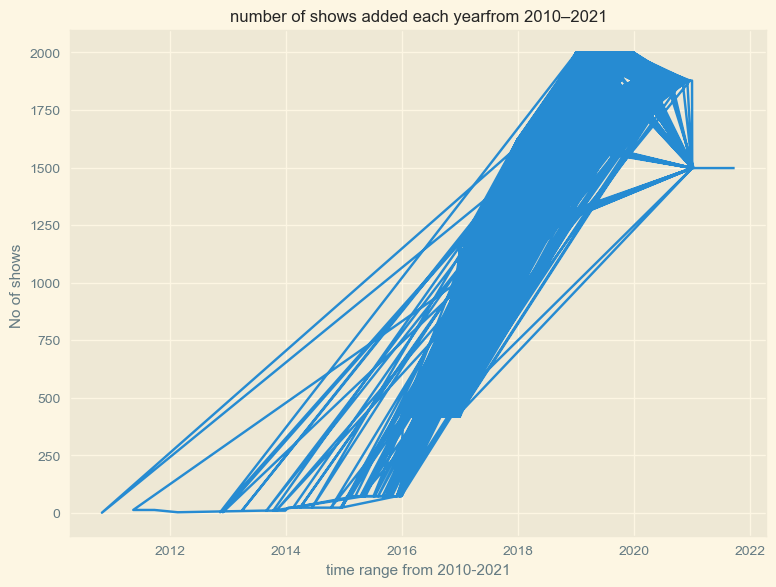

In [36]:
plt.style.use('seaborn-v0_8-notebook')
plt.title("number of shows added each yearfrom 2010–2021")
plt.xlabel("time range from 2010-2021")
plt.ylabel("No of shows ")
plt.plot(df1['date_added'],df1['no of shows'])
plt.show()

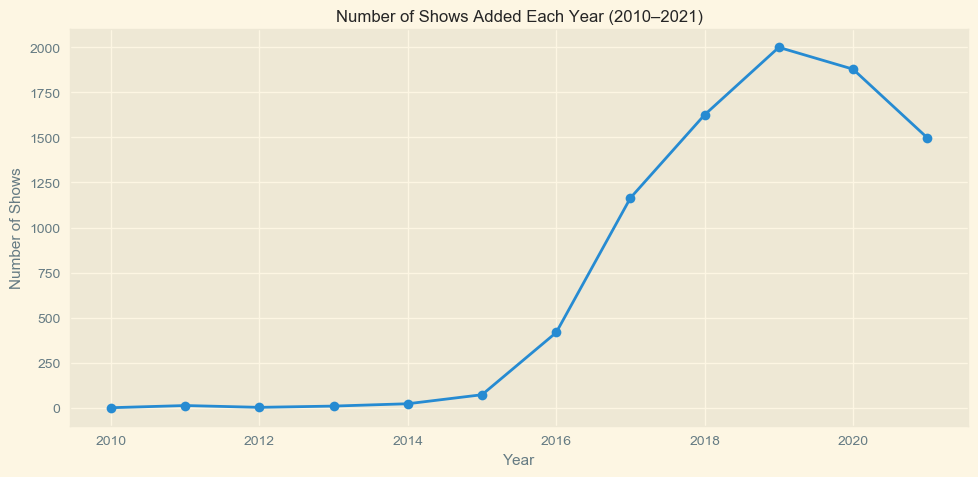

In [37]:

# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Filter for years 2010–2021
df_filtered = df[(df['year_added'] >= 2010) & (df['year_added'] <= 2021)]

# Group by year and count shows
shows_per_year = df_filtered['year_added'].value_counts().sort_index()

# Plot
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(10, 5))
plt.plot(shows_per_year.index, shows_per_year.values, marker='o', linewidth=2)
plt.title("Number of Shows Added Each Year (2010–2021)")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.tight_layout()
plt.show()


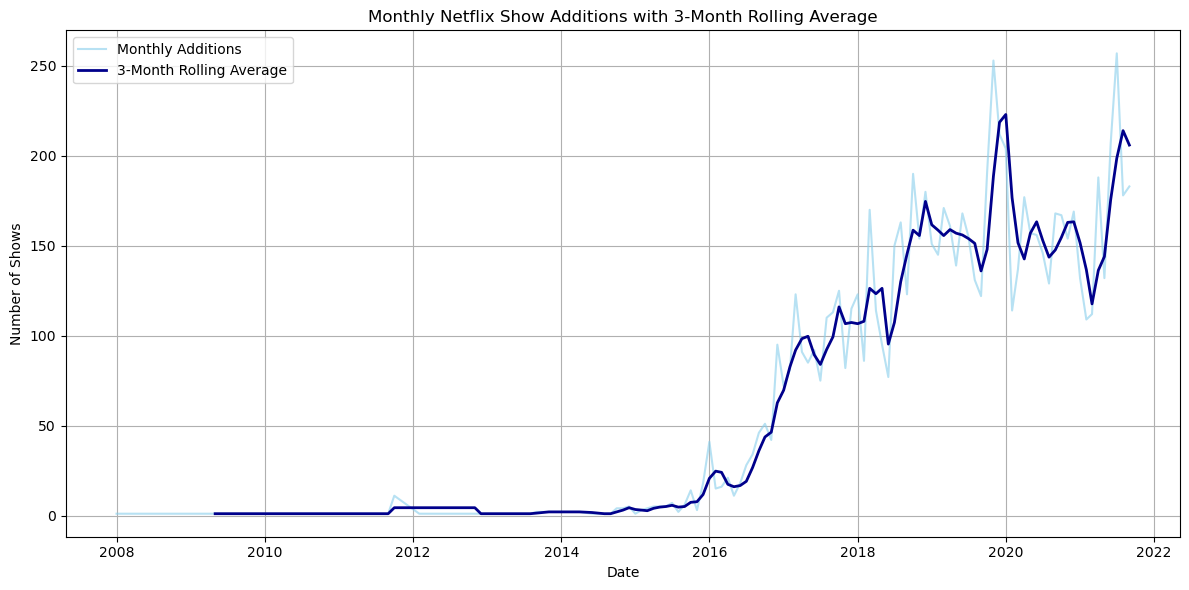

In [4]:
#Difficult: Plot a smoothed line showing monthly trends in additions using a 3-month rolling average.
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])  # drop missing dates
df['year_month'] = df['date_added'].dt.to_period('M')  # example: 2020-04
monthly_counts = df['year_month'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()  # convert PeriodIndex to datetime
rolling_avg = monthly_counts.rolling(window=3).mean()


plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, label='Monthly Additions', color='skyblue', alpha=0.6)
plt.plot(rolling_avg.index, rolling_avg.values, label='3-Month Rolling Average', color='darkblue', linewidth=2)

plt.title("Monthly Netflix Show Additions with 3-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Number of Shows")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

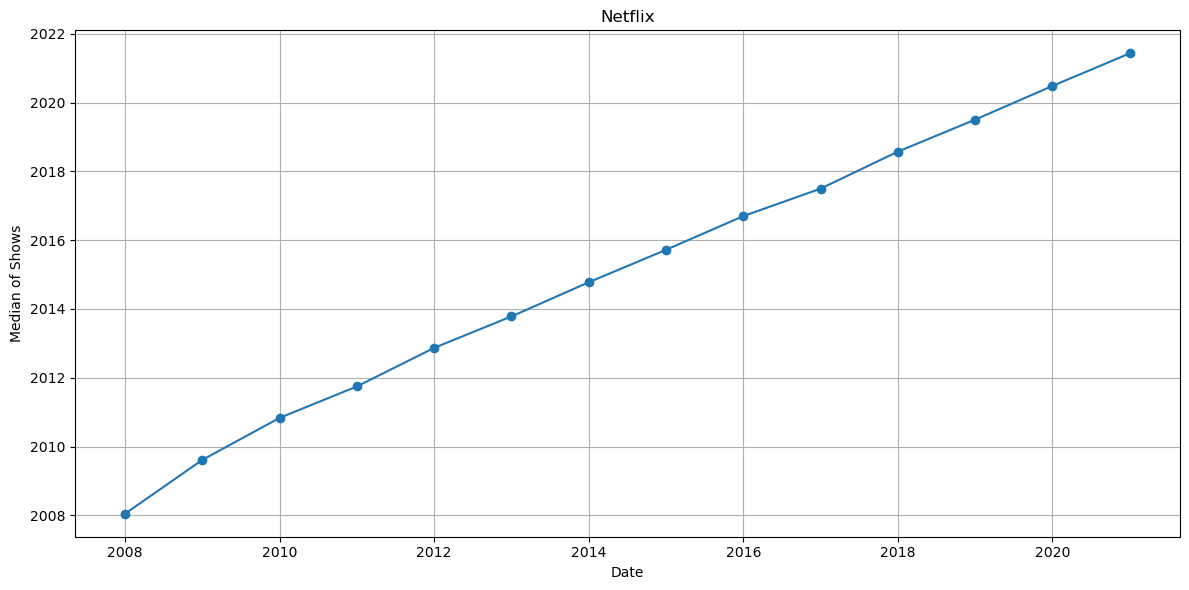

In [26]:
#plot median
df['Year']=df['date_added'].dt.year
df['date_added']=df['date_added'].sort_values()
info1=df.groupby('Year')['date_added'].median()
plt.figure(figsize=(12, 6))
plt.title("Netflix")
plt.xlabel("Date")
plt.ylabel("Median of Shows")
plt.plot(info1.index,info1.values,marker='o')
plt.grid(True)
plt.tight_layout()
plt.show()

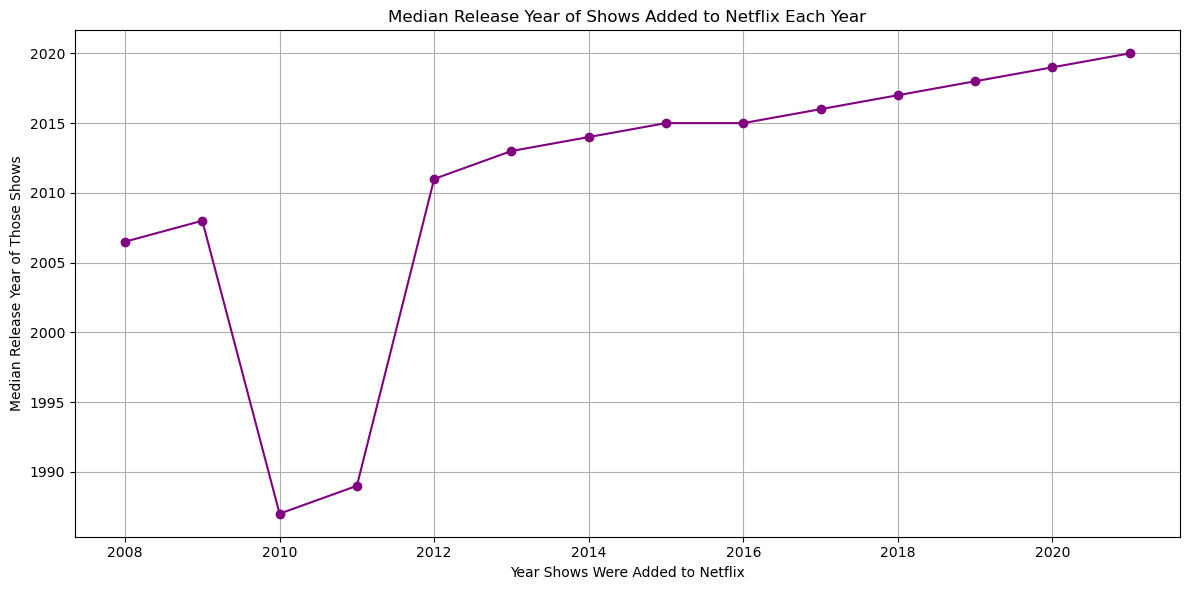

In [27]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])

# Extract year when show was added
df['Year'] = df['date_added'].dt.year

# Group by added year and get median of release_year
median_release_year = df.groupby('Year')['release_year'].median()

# Filter for meaningful years (e.g., last 20 years)
median_release_year = median_release_year[median_release_year.index >= 2000]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(median_release_year.index, median_release_year.values, marker='o', color='purple')
plt.title("Median Release Year of Shows Added to Netflix Each Year")
plt.xlabel("Year Shows Were Added to Netflix")
plt.ylabel("Median Release Year of Those Shows")
plt.grid(True)
plt.tight_layout()
plt.show()


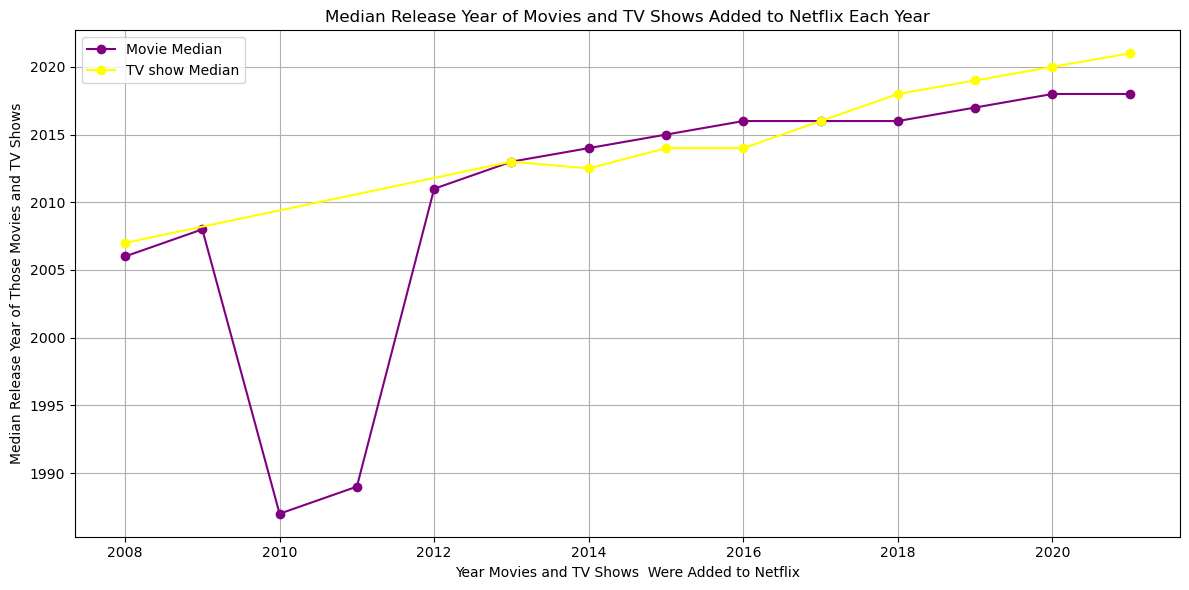

In [34]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])

# Extract year when show was added
df['Year'] = df['date_added'].dt.year

# Group by added year and get median of release_year
median_release_year = df.groupby(['Year','type'])['release_year'].median()

# Filter for meaningful years (e.g., last 20 years)
median_release_year = median_release_year[median_release_year.index.get_level_values(0) >= 2000]
filtered = median_release_year.xs('Movie', level='type')
filtered1 = median_release_year.xs('TV Show', level='type')
# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered.index,filtered, marker='o', color='purple',label="Movie Median")
plt.plot(filtered1.index,filtered1, marker='o', color='Yellow',label="TV show Median")
plt.title("Median Release Year of Movies and TV Shows Added to Netflix Each Year")
plt.xlabel("Year Movies and TV Shows  Were Added to Netflix")
plt.ylabel("Median Release Year of Those Movies and TV Shows")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8709 non-null   object        
 1   type          8709 non-null   object        
 2   title         8709 non-null   object        
 3   director      6168 non-null   object        
 4   cast          7892 non-null   object        
 5   country       7882 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8709 non-null   int64         
 8   rating        8705 non-null   object        
 9   duration      8706 non-null   object        
 10  listed_in     8709 non-null   object        
 11  description   8709 non-null   object        
 12  year_month    8709 non-null   period[M]     
 13  Year          8709 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10), period[M](1)
memory usage: 986.6+ KB


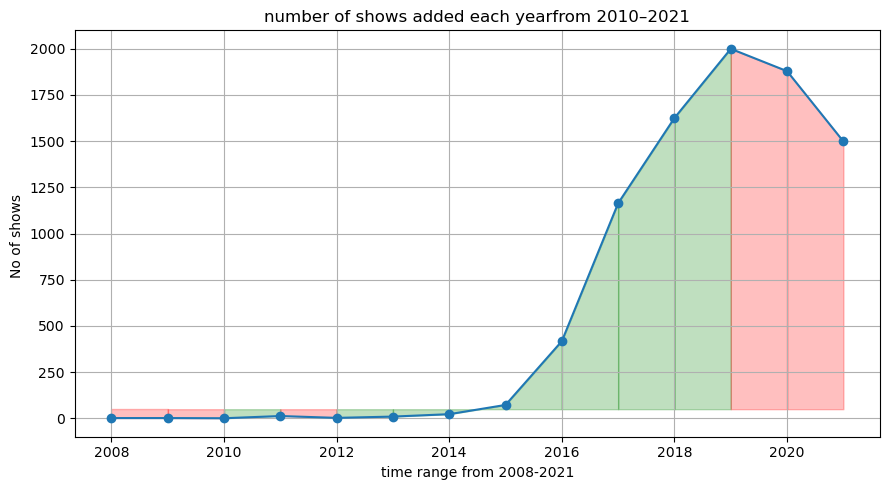

In [122]:
#Medium: Plot the number of shows added per year, and use fill_between to highlight growth (years where additions increased).
 
    

info2=df.groupby('Year')['show_id'].count()
mask = info2.diff() > 0  # First value will be NaN
mask.iloc[0] = False

plt.figure(figsize=(9,5))
plt.title("number of shows added each yearfrom 2010–2021")
plt.xlabel("time range from 2008-2021")
plt.ylabel("No of shows ")
plt.grid(True)
x=info2.index
y=info2.values
plt.plot(x,y,marker='o')
for i in range(len(y)-1):
    x1=[x[i],x[i+1]]
    y1=[y[i],y[i+1]]
    if y[i]<y[i+1]:
        plt.fill_between(x1,y1,50,alpha=0.25,color='green')
    else:
        plt.fill_between(x1,y1,50,alpha=0.25,color='red')
plt.tight_layout()
plt.show()


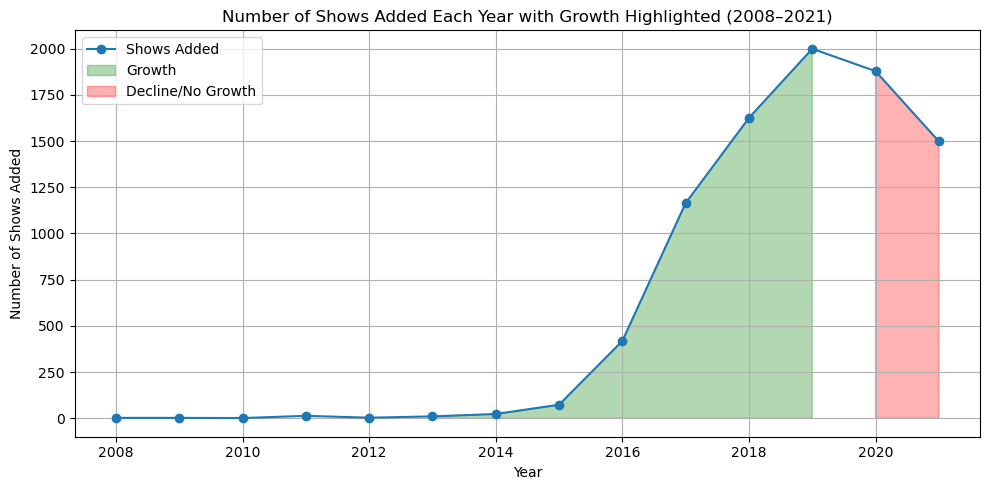

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group by year and count number of shows added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['Year'] = df['date_added'].dt.year
info2 = df.groupby('Year')['show_id'].count()

# Restrict to years of interest
info2 = info2[(info2.index >= 2008) & (info2.index <= 2021)]

# Create a mask where current year has more shows than previous year
growth_mask = info2.diff() > 0  # First value will be NaN

# Replace NaN (first value) with False
growth_mask.iloc[0] = False

# Plot
plt.figure(figsize=(10, 5))
plt.plot(info2.index, info2.values, marker='o', label='Shows Added')

# Fill areas of growth and decline
plt.fill_between(info2.index, info2.values, where=growth_mask, alpha=0.3, color='green', label='Growth')
plt.fill_between(info2.index, info2.values, where=~growth_mask, alpha=0.3, color='red', label='Decline/No Growth')

plt.title("Number of Shows Added Each Year with Growth Highlighted (2008–2021)")
plt.xlabel("Year")
plt.ylabel("Number of Shows Added")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


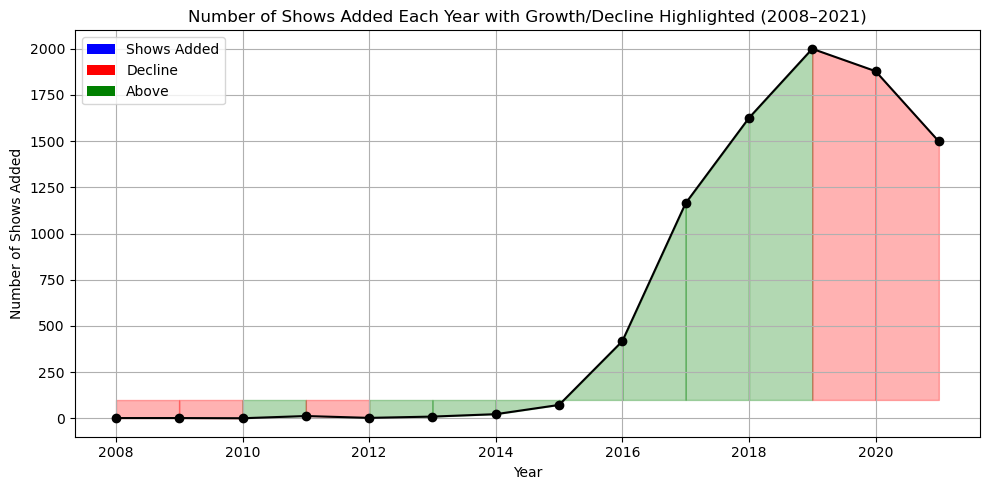

In [106]:
import pandas as pd
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

# Ensure datetime and create Year column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['Year'] = df['date_added'].dt.year

# Count shows per year
info2 = df.groupby('Year')['show_id'].count()
info2 = info2[(info2.index >= 2008) & (info2.index <= 2021)]

# Reset index for easier iteration
years = info2.index.to_numpy()
counts = info2.values

# Plot base line
plt.figure(figsize=(10, 5))
plt.plot(years, counts, marker='o', color='black')

# Fill between segments
for i in range(len(years) - 1):
    xi = [years[i], years[i+1]]
    yi = [counts[i], counts[i+1]]

    if yi[1] > yi[0]:  # Growth
        plt.fill_between(xi, yi,100, color='green', alpha=0.3)
    else:  # Decline or same
        plt.fill_between(xi, yi,100, color='red', alpha=0.3)

# Labels and layout
plt.title("Number of Shows Added Each Year with Growth/Decline Highlighted (2008–2021)")
plt.xlabel("Year")
plt.ylabel("Number of Shows Added")
plt.grid(True)
legend_elements = [
    Patch(facecolor='blue', label='Shows Added'),
    Patch(facecolor='red', label='Decline'),
    Patch(facecolor='green', label='Above'),
]

# Show the legend with custom colors
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()


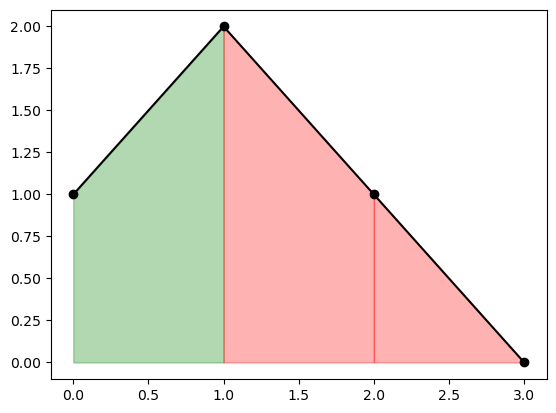

In [92]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 1, 0])  # y1 to y2 is decreasing

plt.plot(x, y, marker='o', color='black')

# Loop through segments
for i in range(len(x)-1):
    xi = x[i:i+2]
    yi = y[i:i+2]

    if yi[1] > yi[0]:  # growth
        plt.fill_between(xi, 0, yi, color='green', alpha=0.3)
    else:  # decline
        plt.fill_between(xi, 0, yi, color='red', alpha=0.3)

plt.show()
